В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
cars_df = pd.read_csv('cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
cars_df.dtypes

,0
Car_ID,int64
Brand,object
Model,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,int64
Engine,int64


In [5]:
cars_df.select_dtypes(include='object').nunique()

,0
Brand,11
Model,58
Fuel_Type,2
Transmission,2
Owner_Type,3


In [6]:
cars_df.select_dtypes(include='int64').nunique()

,0
Car_ID,100
Year,6
Kilometers_Driven,18
Mileage,15
Engine,36
Power,40
Seats,3
Price,31


В наборі даних 8 числових та 5 категоріальних колонок. З них:

* 2 бінарні
* 2 мультикатегоріальних
* 1 колонка, в якій можна встановити відношення порядку

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cars_df.drop('Price', axis=1), cars_df['Price'], test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

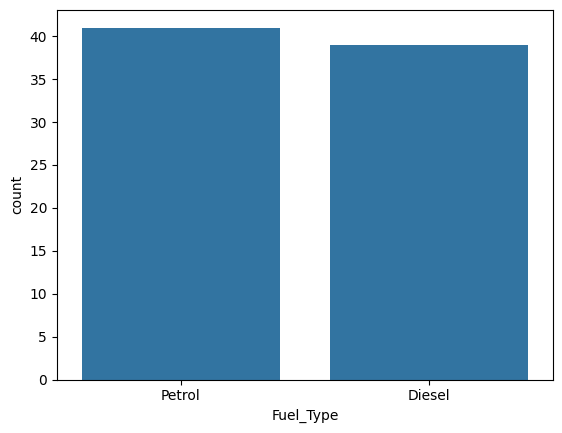

In [8]:
sns.countplot(data=X_train, x='Fuel_Type');

In [9]:
fuel_codes = {'Petrol': 1, 'Diesel': 0}
X_train['fuel_code'] = X_train['Fuel_Type'].map(fuel_codes)
X_test['fuel_code'] = X_test['Fuel_Type'].map(fuel_codes)

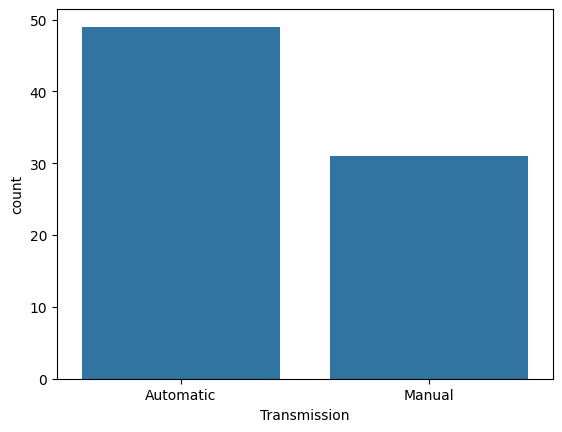

In [10]:
sns.countplot(data=X_train, x='Transmission');

In [11]:
transmission_codes = {'Automatic' : 1, 'Manual' : 0}
X_train['transmission_code'] = X_train['Transmission'].map(transmission_codes)
X_test['transmission_code'] = X_test['Transmission'].map(transmission_codes)

In [12]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [13]:
X_train_encoded = enc.transform(X_train[['Brand']]).toarray()
X_test_encoded = enc.transform(X_test[['Brand']]).toarray()

In [14]:
X_train[enc.categories_[0]] = X_train_encoded
X_test[enc.categories_[0]] = X_test_encoded

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [16]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [17]:
# рахуємо середні ціни для кожної моделі на тренувальному наборі
model_avg_price = X_train.join(y_train).groupby('Model')['Price'].mean()

# віизначаємо діапазони цін (в рупіях)
price_bins = [0, 1000000, 2000000, 3000000, float('inf')]
price_labels = ['Low', 'Mid', 'High', 'Luxury']

model_price_category = pd.cut(model_avg_price, bins=price_bins, labels=price_labels)

X_train['Model_Category'] = X_train['Model'].map(model_price_category)
X_test['Model_Category'] = X_test['Model'].map(model_price_category)

X_test['Model_Category'] = X_test['Model_Category'].cat.add_categories('Unknown')
X_test['Model_Category'] = X_test['Model_Category'].fillna('Unknown')

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(X_train[['Model_Category']])

X_train_encoded = enc.transform(X_train[['Model_Category']]).toarray()
X_test_encoded = enc.transform(X_test[['Model_Category']]).toarray()

X_train[enc.categories_[0]] = X_train_encoded
X_test[enc.categories_[0]] = X_test_encoded

In [18]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Category,High,Low,Luxury,Mid
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Mid,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,1.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Luxury,0.0,0.0,1.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Low,0.0,1.0,0.0,0.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,High,1.0,0.0,0.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Category,High,Low,Luxury,Mid
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Unknown,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Low,0.0,1.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Low,0.0,1.0,0.0,0.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Unknown,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Low,0.0,1.0,0.0,0.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [19]:
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

data_train = pd.concat([X_train_num, y_train], axis=1)

corr_matrix = data_train.corr()
corr_matrix

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,High,Low,Luxury,Mid,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-3.292638e-02,0.011350,0.020129,0.038923,0.001595,-0.010418,0.045253,-2.277372e-02,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,2.487150e-01,-0.219346,0.018255,-0.014499,-0.040875,0.344267,-0.033460,-3.569020e-01,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,3.039932e-02,0.368519,-0.137675,-0.001772,-0.184694,-0.051353,-0.085882,3.312586e-01,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,3.476784e-01,-0.201565,0.085114,0.026624,-0.360762,0.685661,-0.299294,-2.290515e-01,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-3.400512e-01,0.234889,-0.165115,-0.196106,0.373488,-0.675831,0.422312,1.105984e-01,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-3.169886e-01,-0.040478,-0.148437,-0.204309,0.463133,-0.704052,0.543917,-4.421340e-02,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-1.274843e-02,0.348535,-0.094002,-0.043849,0.010541,-0.063742,-0.101187,1.433489e-01,0.000979
fuel_code,0.090537,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,6.616446e-02,-0.008336,0.125010,0.281122,-0.213849,0.204795,0.158383,-1.375430e-01,-0.110782
transmission_code,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-3.976088e-01,-0.076974,0.155500,0.005886,0.474533,-0.591564,0.265132,1.282895e-02,0.680731
Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-1.259882e-01,-0.111111,-0.103221,-0.203925,0.179927,-0.293972,0.166667,4.166667e-02,0.328858


In [20]:
target_correlation = corr_matrix[y_train.name]
significant_correlation = target_correlation[abs(target_correlation) > 0.5]
significant_correlation

,Price
Mileage,-0.638404
Engine,0.710561
Power,0.849137
transmission_code,0.680731
High,0.588590
Low,-0.848141
Luxury,0.578725
Price,1.000000


**Висновок**
Найбільше Price колонка корелює з таками колонками: Milage, Engine, Power, trasmission_code, High, Low, Luxury

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [21]:
model = LinearRegression().fit(X_train_num, y_train)
predictions_train = model.predict(X_train_num)
predictions_test = model.predict(X_test_num)
rmse_train = root_mean_squared_error(y_train, predictions_train)
rmse_test = root_mean_squared_error(y_test, predictions_test)

print('Loss train:', rmse_train, '\nLoss test:', rmse_test)

Loss train: 135894.6645974563 
Loss test: 435994.11487568356


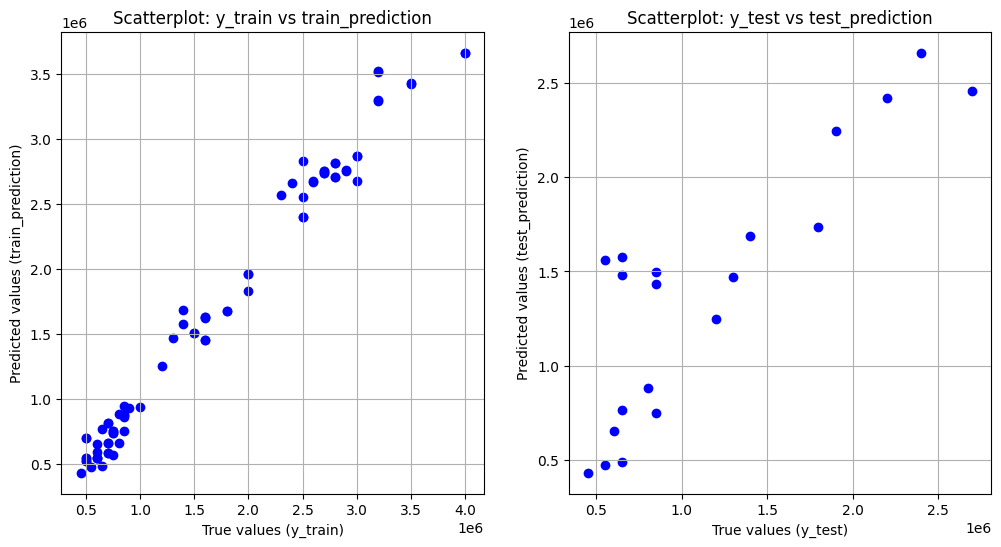

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, predictions_train, color='blue')
plt.title("Scatterplot: y_train vs train_prediction")
plt.xlabel("True values (y_train)")
plt.ylabel("Predicted values (train_prediction)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_test, color='blue')
plt.title("Scatterplot: y_test vs test_prediction")
plt.xlabel("True values (y_test)")
plt.ylabel("Predicted values (test_prediction)")
plt.grid(True)
plt.show()


**Висновки**
На тренувальних даних модель добре передбачає цілову змінну, точки лежать досить близько до діагоналі, але це може бути ознакою того, що модель перенавчилась.

На тестових даних точки більш розкидані і лежать не так близько до доіагоналі. Це може означати, що модель не навчилась добре узагальнювати дані, яких вона ще не бачила.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [23]:
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)

In [24]:
model_std = LinearRegression().fit(X_train_scaled_df, y_train)
predictions_train_std = model_std.predict(X_train_scaled_df)
predictions_test_std = model_std.predict(X_test_scaled_df)
rmse_train_std = root_mean_squared_error(y_train, predictions_train_std)
rmse_test_std = root_mean_squared_error(y_test, predictions_test_std)

print('Loss train:', rmse_train_std, '\nLoss test:', rmse_test_std)

Loss train: 135894.66459745553 
Loss test: 357817.1141746597


In [25]:
coefficients = model_std.coef_
feature_names = model_std.feature_names_in_

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients_df)

              Feature    Coefficient  Absolute Coefficient
22                Low -333606.752345         333606.752345
23             Luxury  309069.622487         309069.622487
5               Power  237831.532048         237831.532048
21               High  191134.890084         191134.890084
8   transmission_code  104311.839036         104311.839036
16           Mercedes  103215.029057         103215.029057
10                BMW   90569.925184          90569.925184
9                Audi   82373.238064          82373.238064
7           fuel_code  -72419.920159          72419.920159
19         Volkswagen  -70796.968070          70796.968070
13            Hyundai  -65809.930194          65809.930194
4              Engine  -62555.352954          62555.352954
14           Mahindra  -53157.351098          53157.351098
17               Tata  -48185.640796          48185.640796
2   Kilometers_Driven  -47025.529162          47025.529162
15             Maruti  -42113.181965          42113.1819

In [26]:
model_std.intercept_

1680000.000000001

**Висновки**
Найвпливовішими коефіцієнтами є:

* Low(моделі з найнижчою ціною). Коефцієнт -333606.75. Знижує базову ціну авто
* Luxury (найдорожчі моделі) Коефіцієнт 309069.62. Підвищує ціну авто
* Power, коефіцієнт 237831.53. Підвищує ціну
* High (категорія авто з високою ціною). Коефіцієнт 191134.89 - підвищує ціну
* transmission_code. Коефіцієнт 104311.839 - піднімає ціну
* Mercedes, коеф 103215.02 - сильний позитивний вплив на ціну
* Преміальні бренди (BMW, Audi, Mercedes) мають позитивний вплив, а більш масові бренди (Volkswagen, Tata, Hyundai, Mahindra, Ford, Maruti) мають негативний.
* Пробіг має невеликий, але негативний вплив.

* Результати виглядають логічно. Автомобілі преміум-класу з високою потужністю і новіших років оцінюються вище, а бюджетні автомобілі та автомобілі з великим пробігом — нижче.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [27]:
Y = y_train
X = X_train_scaled_df
X = X.set_index(Y.index)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

,0
const,1.680000e+06
Car_ID,5.413212e+02
Year,-2.209545e+04
Kilometers_Driven,-4.702553e+04
Mileage,-2.707160e+04
Engine,-6.255535e+04
Power,2.378315e+05
Seats,3.353987e+04
fuel_code,-7.241992e+04
transmission_code,1.043118e+05


In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     138.5
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           3.35e-41
Time:                        21:50:43   Log-Likelihood:                -1059.1
No. Observations:                  80   AIC:                             2166.
Df Residuals:                      56   BIC:                             2223.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   1.82e+0

**Статиситично занчущі змінні** : Power, transmission_code, Audi, BMW, Hundai, Mahindra, Mercedes, Volkswagen, High, Low, Luxury



**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [29]:
significant_features = results.pvalues[results.pvalues < 0.05].index
significant_features = significant_features.drop('const', errors='ignore')
X_significant = X_train_scaled_df[significant_features]
X_significant

,Power,transmission_code,Audi,BMW,Hyundai,Mahindra,Mercedes,Volkswagen,High,Low,Luxury
0,-0.231967,0.795395,-0.333333,-0.356034,-0.284747,-0.229416,-0.356034,3.229330,-0.596601,-0.881917,-0.333333
1,0.247012,0.795395,3.000000,-0.356034,-0.284747,-0.229416,-0.356034,-0.309662,1.676163,-0.881917,-0.333333
2,0.910213,0.795395,3.000000,-0.356034,-0.284747,-0.229416,-0.356034,-0.309662,-0.596601,-0.881917,3.000000
3,-0.784634,-1.257237,-0.333333,-0.356034,-0.284747,-0.229416,-0.356034,3.229330,-0.596601,1.133893,-0.333333
4,0.910213,0.795395,-0.333333,-0.356034,-0.284747,-0.229416,2.808717,-0.309662,1.676163,-0.881917,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
75,-1.140798,-1.257237,-0.333333,-0.356034,-0.284747,-0.229416,-0.356034,-0.309662,-0.596601,1.133893,-0.333333
76,2.801564,0.795395,-0.333333,-0.356034,-0.284747,-0.229416,-0.356034,-0.309662,1.676163,-0.881917,-0.333333
77,-0.330219,0.795395,-0.333333,-0.356034,-0.284747,4.358899,-0.356034,-0.309662,-0.596601,1.133893,-0.333333
78,0.247012,0.795395,-0.333333,2.808717,-0.284747,-0.229416,-0.356034,-0.309662,1.676163,-0.881917,-0.333333


In [30]:
X_significant = X_significant.set_index(Y.index)
X_significant = sm.add_constant(X_significant)
model_significant = sm.OLS(Y, X_significant)
results_significant = model_significant.fit()
print(results_significant.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     271.3
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.29e-51
Time:                        21:50:43   Log-Likelihood:                -1069.3
No. Observations:                  80   AIC:                             2163.
Df Residuals:                      68   BIC:                             2191.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   1.87e+0

**Висновки**

Після видалення колонок з p-value быльше 0.05 показники моделі R_squared та Adj. R-squared стали трошки менші.
R_squared було 0,983 стало 0,978
Adj. R-squared було 0,976 стало 0,974

В цій моделі стазничущими є: power, transmission, Audi, BMW, Mercedes, High, Low, Luxury

Видалення не значущих колонок не погіршило R-squared та Adj. R-squared - видалені ознаки дійсно не додавали корисної інформації для передбачення цільової змінної.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [33]:
significant_features_025 = results.pvalues[results.pvalues < 0.25].index
significant_features_025 = significant_features_025.drop('const', errors='ignore')
X_significant025 = X_train_scaled_df[significant_features_025]

X_significant025 = X_significant025.set_index(Y.index)
X_significant025 = sm.add_constant(X_significant025)
model_significant025 = sm.OLS(Y, X_significant025)
results_significant025 = model_significant025.fit()
print(results_significant025.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     206.7
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           4.44e-48
Time:                        21:53:19   Log-Likelihood:                -1062.2
No. Observations:                  80   AIC:                             2158.
Df Residuals:                      63   BIC:                             2199.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   1.78e+0

**Висновки**
Порівняно з попередніми двома моделлями, R-squared та Adj. R-squared змінилися не значно, що говорить про те що всі три моделі передбачають цільову зміннну досить точно. Серед тих трьох моделей, я би обрала другу(з чинниками, у яких p-value менше на 0.05) через те що вона найменш навантажена ознаками, що дозволяє уникнути перенавчання і є більш зручною для аналізу